<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [66]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [67]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [68]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [69]:
boston_df = pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [70]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2

#### For the "Median value of owner-occupied homes" provide a boxplot

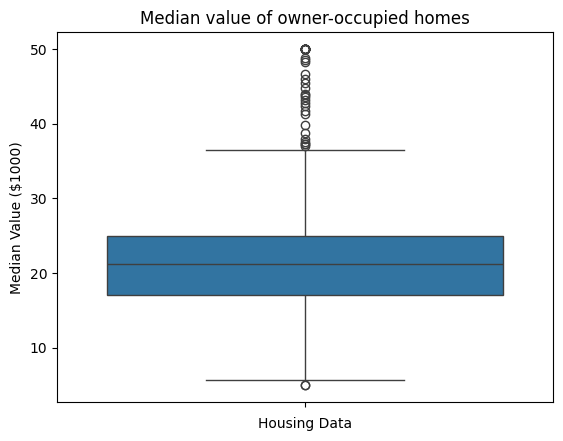

In [71]:
sns.boxplot(y="MEDV", data=boston_df)
pyplot.title("Median value of owner-occupied homes")
pyplot.ylabel("Median Value ($1000)")
pyplot.xlabel("Housing Data")
pyplot.show()

#### Provide a  bar plot for the Charles river variable

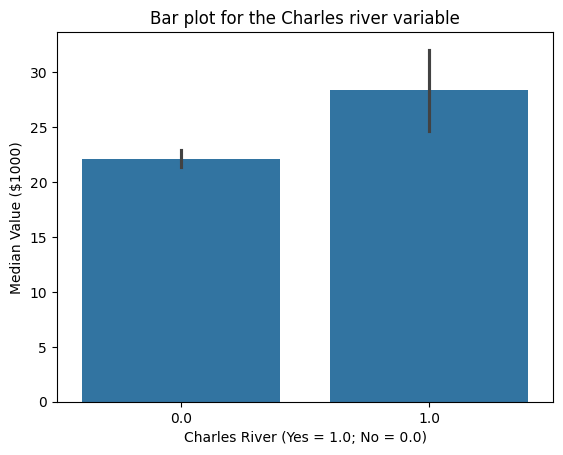

In [72]:
sns.barplot(y="MEDV", x="CHAS", data=boston_df)
pyplot.title("Bar plot for the Charles river variable")
pyplot.xlabel("Charles River (Yes = 1.0; No = 0.0)")
pyplot.ylabel("Median Value ($1000)")
pyplot.show()

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [73]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years & younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 & 70 years'
boston_df.loc[(boston_df['AGE'] >= 57), 'AGE_GROUP'] = '70 years & older'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,70 years & older
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years & older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,70 years & older
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 & 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 & 70 years


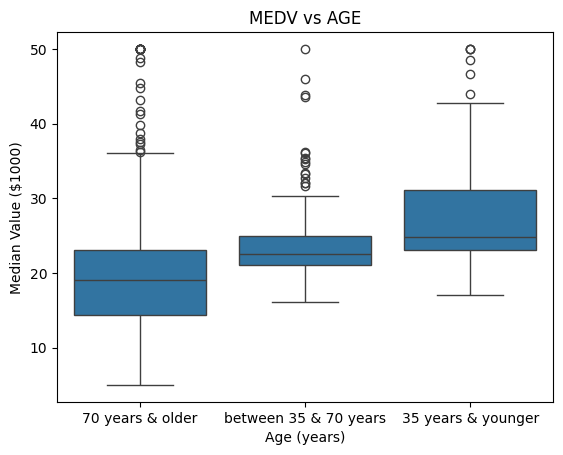

In [74]:
sns.boxplot(y="MEDV", x="AGE_GROUP", data=boston_df)
pyplot.title("MEDV vs AGE")
pyplot.xlabel("Age (years)")
pyplot.ylabel("Median Value ($1000)")
pyplot.show()

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

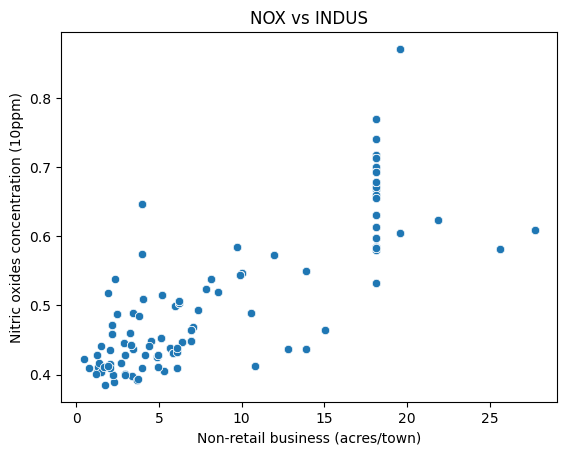

In [75]:
sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
pyplot.title("NOX vs INDUS")
pyplot.xlabel("Non-retail business (acres/town)")
pyplot.ylabel("Nitric oxides concentration (10ppm)")
pyplot.show()

**Comments**: There seems to be slightly strong possitve correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town i.e. more the proportion of non-retail business more the Nitric oxide concentrations

#### Create a histogram for the pupil to teacher ratio variable

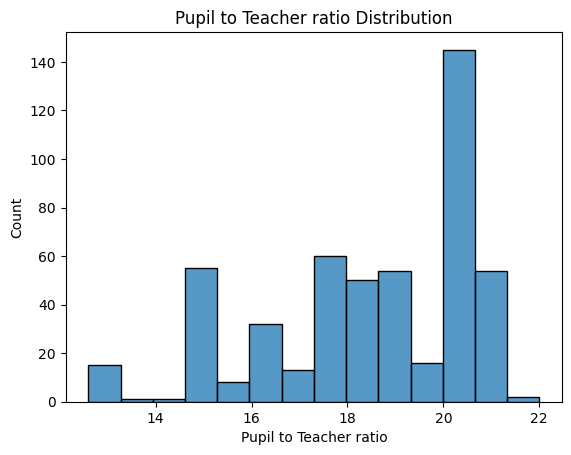

In [76]:
sns.histplot(boston_df["PTRATIO"], kde=False)
pyplot.title("Pupil to Teacher ratio Distribution")
pyplot.xlabel("Pupil to Teacher ratio")
pyplot.show()

## Task 3

#### Is there a significant difference in median value of houses bounded by the Charles river or not?

Hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river")

α = 0.05

In [77]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Comments**: Since p-value is **0.000074** which is less than α = 0.05, we **reject the null hypothesis** and say that there is a significant difference in median value of houses that are bounded by the Charles river and those that are not

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

Hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses for each proportion of owner occupied units built prior to 1940")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses for each proportion of owner occupied units built prior to 1940")

α = 0.05

In [78]:
thirtyfive_lower_eval = boston_df[boston_df['AGE_GROUP'] == '35 years & younger']['MEDV']
thirtyfive_seventy_eval = boston_df[boston_df['AGE_GROUP'] == 'between 35 & 70 years']['MEDV']
seventy_older_eval = boston_df[boston_df['AGE_GROUP'] == '70 years & older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_eval, thirtyfive_seventy_eval, seventy_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F_Statistic: 29.028583208977576, P-Value: 1.1723548056383608e-12


**Comments**: Since p-value is **0.0000000000012** which is less than α = 0.05, we **reject the null hypothesis** and say that there is a significant difference in Median values of houses for each proportion of owner occupied units built prior to 1940

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Hypothesis

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

α = 0.05

In [79]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Comments**: Since p-value is **7.91** which is more than α = 0.05, we **fail reject the null hypothesis** and say that there is no correlation betwwen Nitric oxide concentrations and proportion of non-retail business acres per town